In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image
from scipy.misc import imread
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Simple K-Means
In this assignment, we will walk you through an implementation of the simple K-Means algorithm.

The K-means algorithm works as follows, assuming we have inputs $x_{1}$, $x_{2}$, $x_{3}$, ..., $x_{n}$ and value of K
- Step 1 - Pick K random points as cluster centers called centroids.
- Step 2 - Assign each $x_{i}$ to nearest cluster by calculating its distance to each centroid.
- Step 3 - Find new cluster center by taking the average of the assigned points.
- Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

![alt text](kmeansdetail.gif "2D K-means")

# Image Clustering

In [12]:
image_data = imread("flowers.jpg")

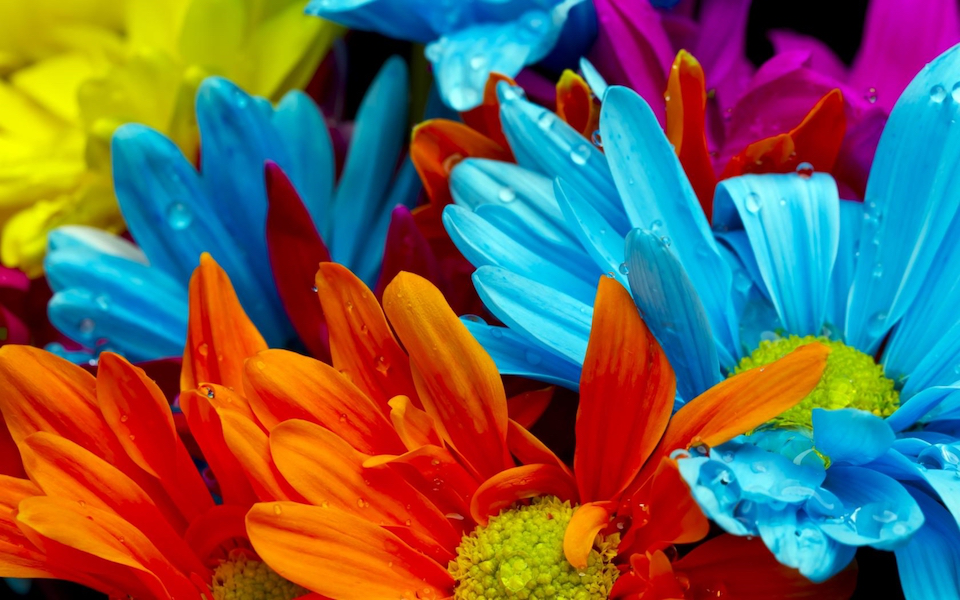

In [13]:
Image.fromarray(image_data, 'RGB')

In [14]:
k = 10

### Step1: Initialize k random points as centroids

In [15]:
pixel_clusters = np.random.randint(0, high=k, size=(image_data.shape[0], image_data.shape[1]))

In [16]:
cluster_centers = np.array([image_data[pixel_clusters == i].mean(axis=0) for i in range(k)])

### Step 2: Assign each $x_{i}$ to nearest cluster by calculating its distance to each centroid.

In [17]:
for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
        pixel_clusters[i][j] = np.argmin(np.linalg.norm(cluster_centers - image_data[i][j],axis=1))

### Step 3 - Find new cluster center by taking the average of the assigned points.

In [18]:
for z in range(5):
    for i in range(k):
        data_points = image_data[pixel_clusters == i]
        cluster_centers[i] = data_points.mean(axis=0) if data_points.size > 0 else np.random.rand(3) * 255
    for i in range(image_data.shape[0]):
        for j in range(image_data.shape[1]):
            pixel_clusters[i][j] = np.argmin(np.linalg.norm(cluster_centers - image_data[i][j], axis=1))

In [19]:
output_image = np.zeros(image_data.shape)
for i in range(output_image.shape[0]):
    for j in range(output_image.shape[1]):
        output_image[i][j] = cluster_centers[pixel_clusters[i][j]]

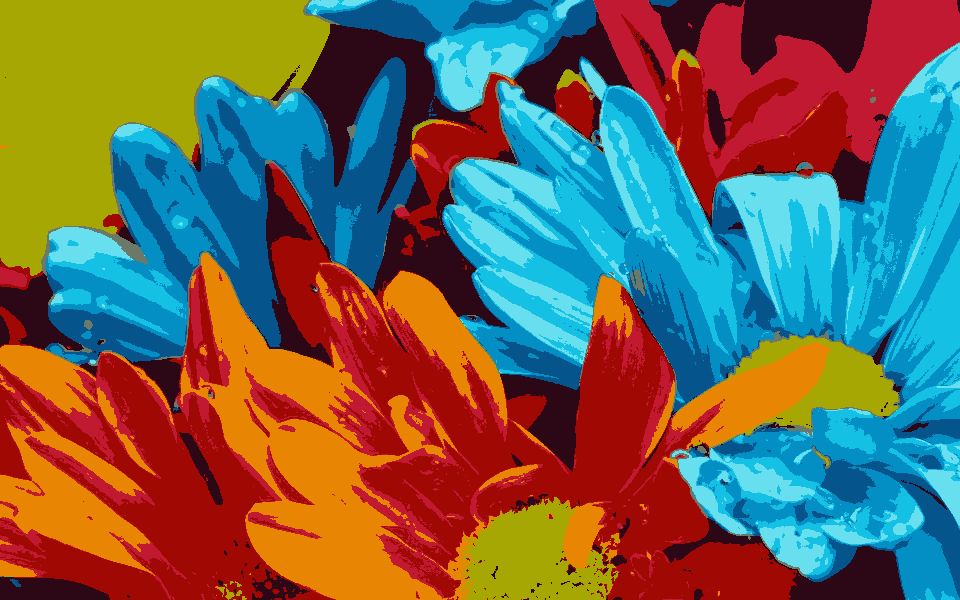

In [20]:
Image.fromarray(output_image.astype('uint8'), 'RGB')